In [1]:
import os
import json
import zipfile


files = os.listdir('./data/Flicker8k_Dataset')
zf = zipfile.ZipFile('./data/Flickr8k_text.zip', 'r')
print(zf.namelist())

['CrowdFlowerAnnotations.txt', 'ExpertAnnotations.txt', 'Flickr8k.lemma.token.txt', '__MACOSX/', '__MACOSX/._Flickr8k.lemma.token.txt', 'Flickr8k.token.txt', 'Flickr_8k.devImages.txt', 'Flickr_8k.testImages.txt', 'Flickr_8k.trainImages.txt', 'readme.txt']


In [2]:
try:
    data_train = zf.read('Flickr_8k.trainImages.txt')
    data_test = zf.read('Flickr_8k.testImages.txt')
    data_token = zf.read('Flickr8k.token.txt')
except KeyError:
        print('ERROR: Did not find %s in zip file' % filename)

data_token_split = data_token.splitlines()

for row in data_token_split[1:10]:
    print(row)

b'1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .'
b'1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .'
b'1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .'
b'1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .'
b'1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting'
b'1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .'
b'1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .'
b'1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .'
b'1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .'


{'captions': ['A man in an orange hat starring at something .', 'A man wears an orange hat and glasses .', 'A man with gauges and glasses is wearing a Blitz hat .', 'A man with glasses is wearing a beer can crocheted hat .', 'The man with pierced ears is wearing glasses and an orange hat .'], 'id': '1007129816_e794419615', 'filepath': './data/Flicker8k_Dataset/1007129816_e794419615.jpg'}
{'captions': ['A bunch of kids run on a school play field .', 'A group of children in a field .', 'A group of children running in the grass .', 'Kids play soccer on a field .', 'Kids running in the field .'], 'id': '1685990174_09c4fb7df8', 'filepath': './data/Flicker8k_Dataset/1685990174_09c4fb7df8.jpg'}
{'captions': ["A boy on a bicycle rides with his little brother in a child 's seat , which is tipping .", 'A boy rides down the street with a younger boy behind him on the same bike .', 'Two boys with backpacks ride bikes through a puddle on the road .', 'Two people riding a bike are riding towards a s

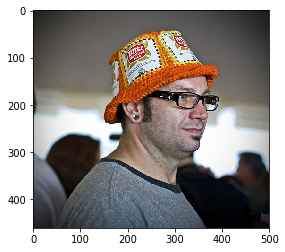

In [6]:
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

i = 0
entry = []
out = []
out_train = []
out_test = []

fp_start = './data/Flicker8k_Dataset/'

for row in data_token.splitlines():
    if ((i+1) % 5 == 0):
        entry.append(re.search(br"(?<=\t)[\w\W]+",row).group(0).decode('ASCII'))
        
        jimg = {}
        jimg['captions'] = entry
        jimg['id'] = re.search(br"[\w._]+(?=.jpg)",row).group(0).decode('ASCII')
        jimg['filepath'] = fp_start + re.search(br"[\w._]+(?=#[0-4])",row).group(0).decode('ASCII')
        
        if re.search(br"[\w._]+(?=#[0-4])",row).group(0) in data_test.splitlines():
            out_test.append(jimg)
        elif re.search(br"[\w._]+(?=#[0-4])",row).group(0) in data_train.splitlines():
            out_train.append(jimg)
        my_file = Path(jimg['filepath'])
        if my_file.is_file():
            out.append(jimg)
        entry = []
    else:
        entry.append(re.search(br"(?<=\t)[\w\W]+",row).group(0).decode('ASCII'))
    i+=1
print(out[4])
print(out_train[500])
print(out_test[500])
print(len(out))


img=mpimg.imread(out[4]['filepath'])
imgplot = plt.imshow(img)

In [7]:
with open("data_file_captions.json", "w") as write_file:
    json.dump(out, write_file)

json.dump(out, open("all_imgcap.json", "w"))    
json.dump(out_test, open("test_imgcap.json", "w"))
json.dump(out_train, open("train_imgcap.json", "w"))